<a href="https://colab.research.google.com/github/GenAIUnplugged/langGraph_series/blob/main/Difference_between_langchain_langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U langchain langgraph langchain_openai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.9/680.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.77.0
    Uninstalling openai-1.77.0:
      Successfully uninstalled openai-1.77.0


In [8]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [9]:
from langchain_openai import ChatOpenAI
from langchain.agents import create_react_agent,AgentExecutor
from langchain.tools import Tool,tool
from langchain import hub

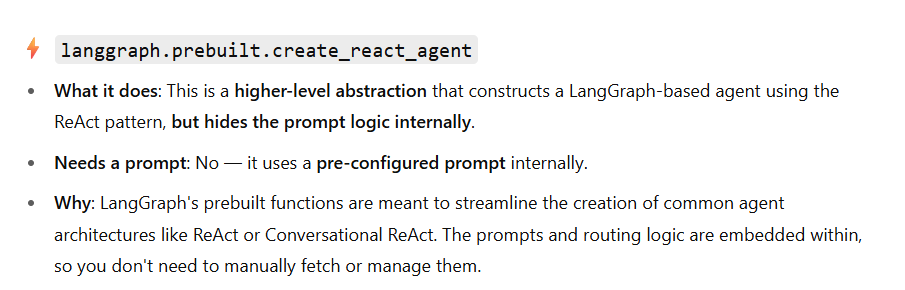

In [25]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from langchain.tools import Tool
from langchain_core.messages import HumanMessage

# Define simple math tool
def calculate(expression: str) -> str:
    return str(eval(expression))

tool = Tool.from_function(
    func=calculate,
    name="Calculator",
    description="Evaluates basic math expressions"
)

# Use a correct model that supports tool calling
llm = ChatOpenAI(model="gpt-4o-mini")  # also works: gpt-3.5-turbo-1106

# Create LangGraph ReAct agent
agent_app = create_react_agent(llm, [tool])

# Invoke agent with explicit messages in the initial state
response = agent_app.invoke({"messages": [HumanMessage(content="What is 12 * 13?")]})
print("Final Output:", response["messages"][-1].content)

Final Output: 12 * 13 equals 156.


For LangGraph agents created via create_react_agent, the expected schema is: \
```
{
  "messages": List[Tuple[str, str]]  # where str is one of "human", "system", "ai", etc.
}
```

 In LangGraph, the core concept revolves around defining workflows as graphs, and the StateGraph is the fundamental class for building these graphs. \
 While you are currently using langgraph.prebuilt.create_react_agent, which is a convenient helper function that internally uses a StateGraph to define the ReAct agent's workflow, you don't explicitly see the StateGraph in your current code because the prebuilt agent abstracts it away. \

 However, if you were building a custom agent or a more complex workflow with LangGraph, you would indeed start by initializing a StateGraph, defining the state, adding nodes (representing steps or actions), and adding edges (representing transitions between nodes). \

So, while the create_react_agent simplifies the process for a standard ReAct agent by handling the StateGraph setup for you, the underlying mechanism in LangGraph still relies on the graph structure defined by StateGraph.


# Langgraph

In [26]:
from langchain.agents import create_react_agent,AgentExecutor
from langchain import hub

In [29]:
prompt = hub.pull("hwchase17/react")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


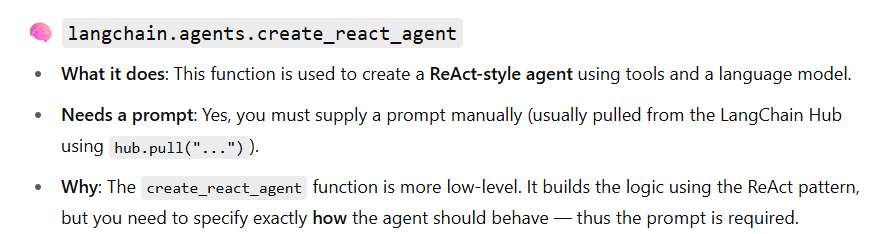

In [32]:
agent = create_react_agent(llm=llm,tools=[tool],prompt=prompt)

In [33]:
executor = AgentExecutor.from_agent_and_tools(agent=agent,tools=[tool])

In [34]:
result = executor.invoke({"input":"What is 12 * 13?"})
result

{'input': 'What is 12 * 13?', 'output': '156'}

**In the agentexecutor response it is a dict with keys input & ouput**